## Neural Network Tensorflow

In [37]:
import numpy as np


In [2]:
import tensorflow as tf

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

In [5]:
rand_a = np.random.uniform(0,100,(5,5))

In [6]:
rand_a

array([[ 99.43179012,  52.06653967,  57.87895355,  73.48190583,
         54.19617722],
       [ 91.31535577,  80.7920151 ,  40.29978307,  35.72243428,
         95.28767147],
       [ 34.36315779,  86.50998163,  83.02777122,  53.81614492,
         92.24693726],
       [  9.71464798,  10.28474932,  70.15072957,  89.04798691,
         15.95603009],
       [ 27.55725449,  67.24915297,  16.4303124 ,  70.13711366,
         48.76352222]])

In [7]:
rand_b = np.random.uniform(0,100,(5,1))

In [8]:
rand_b

array([[ 68.06777682],
       [ 52.15481923],
       [  4.33966944],
       [ 22.39366035],
       [ 57.52050869]])

In [9]:
a = tf.placeholder(tf.float32)

In [10]:
b = tf.placeholder(tf.float32)

In [11]:
add_op = a + b

In [12]:
mul_op = a * b

In [16]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a, b: rand_b})
    print(add_result)    
    print('\n')
    mult_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[ 167.49957275  120.13432312  125.94673157  141.54968262  122.26396179]
 [ 143.47016907  132.94683838   92.4546051    87.8772583   147.44248962]
 [  38.70282745   90.84964752   87.36743927   58.15581131   96.58660889]
 [  32.10830688   32.67840958   92.54438782  111.44165039   38.34968948]
 [  85.07775879  124.76966095   73.95082092  127.65762329  106.2840271 ]]


[[ 6768.1015625   3544.05371094  3939.69165039  5001.75        3689.01342773]
 [ 4762.53564453  4213.69287109  2101.82788086  1863.09716797
   4969.71142578]
 [  149.1247406    375.42468262   360.31304932   233.54426575
    400.32119751]
 [  217.54652405   230.31317139  1570.93151855  1994.11035156
    357.31390381]
 [ 1585.1072998   3868.20532227   945.07995605  4034.32250977
   2804.90258789]]


## Example Neural Network

In [17]:
n_features = 10

In [18]:
n_dense_neurons = 3

In [19]:
x = tf.placeholder(tf.float32,(None,n_features))

In [20]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

In [21]:
b = tf.Variable(tf.ones([n_dense_neurons]))

In [22]:
xW = tf.matmul(x,W)

In [23]:
z = tf.add(xW,b)

In [25]:
a = tf.sigmoid(z)


In [26]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [30]:
print(layer_out)

[[ 0.24964897  0.71806413  0.36195123]]


## Simple Regression Example

In [31]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [32]:
x_data

array([  0.41186709,   0.5849351 ,   1.0749565 ,   1.98663632,
         4.8574204 ,   6.49235324,   7.17744793,   8.23308089,
         8.66259572,  10.46978601])

In [34]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [35]:
y_label

array([ -0.8725155 ,   1.59088467,   2.31109242,   4.07889444,
         3.22571501,   6.40912111,   7.22839278,   8.36301327,
         8.87948845,  11.42608338])

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

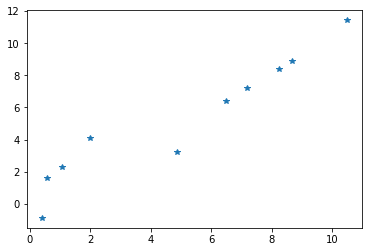

In [46]:
plt.plot(x_data,y_label,"*")

In [47]:
#y = mx + b

In [49]:
m = tf.Variable(0.44)

In [50]:
b = tf.Variable(0.87)

In [52]:
error = 0

for x,y in zip(x_data,y_label):
    y_hat  = m * x + b
    error += (y-y_hat)**2

In [54]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [55]:
init = tf.global_variables_initializer()

In [61]:
with tf.Session() as sess:
    sess.run(init)
    
    traning_steps = 100
    
    for i in range(traning_steps):
        sess.run(train)
        
    final_slope , final_intercept = sess.run([m,b])    

In [58]:
x_test = np.linspace(-1,11,10)

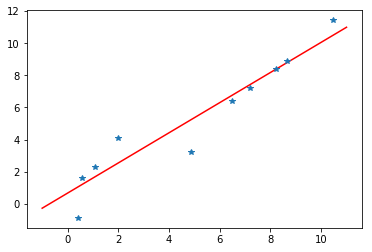

In [62]:
y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')